In [223]:
1+2*3

7

In [224]:
2^3   #XOR     binary of 2 is 10,  binary of 3 is 11,  XOR  10 XOR 11  = 01

1

In [225]:
2**3

8

In [226]:
import math as m
m.sqrt(9)

3.0

In [227]:
m.cos(3.141592654/2)   #cos 90 degree    pi /2  use radian
# equal  to Zero

-2.0510342851533115e-10

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Reading the dataset for Local harddisk from Annaconda Jupyter notebook
# Google Colab can't read your local hard-disk file!!!  It's impossible 
# df = pd.read_excel("C:/Users/User/Downloads/consumer-bank-data.xlsx",sheet_name=0)
# df = pd.read_csv(r"C:\Users\User\Downloads\ consumer-bank-data.csv")
# df = pd.read_csv("/user/yourname/files/ consumer-bank-data.csv") # for Mac

# you can use only below for Google Colab
df = pd.read_csv("https://www.sunontechnology.com/data/consumer-bank-data.csv")
print("File read.")


File read.


In [229]:
df.head()  # show the header of the file

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Sales,Credit_History,Country,Loan_Status,Product,Product_Category,Saving_AC,Current_AC,MPF,Perference
0,LD001536,Male,Yes,3.0,Graduate,No,59996,0.0,NaN,180.0,NaN,0.0,Taiwan,N,Life Insurance,Home Equity,364610,56585,69108,Face To Face
1,LD002840,Female,No,0.0,Graduate,No,9512,0.0,NaN,360.0,NaN,1.0,Philipines,N,Personal Loan,Loan,48187,16681,127375,Online
2,LD001030,Male,Yes,2.0,Graduate,No,5196,10860.0,NaN,120.0,NaN,1.0,Singapore,Y,Personal Loan,Loan,380180,46129,97624,Online
3,LD001325,Male,No,0.0,Not Graduate,No,14480,0.0,NaN,120.0,NaN,1.0,Philipines,Y,Personal Loan,Loan,49062,5022,69577,Face To Face
4,LD001482,Male,Yes,0.0,Graduate,Yes,13836,0.0,NaN,120.0,NaN,1.0,Hong Kong,Y,Personal Loan,Loan,339129,2348,77182,Face To Face


In [230]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Sales,Credit_History,Saving_AC,Current_AC,MPF
count,599.000000,614.00000,614.000000,594.000000,600.00000,585.000000,564.000000,614.000000,614.000000,614.000000
mean,0.762938,20043.80456,14261.055374,18501.683502,342.00000,76735.897436,0.842199,222446.938111,29830.874593,96002.257329
std,1.015216,14213.12500,16802.059166,30535.206184,65.12041,57692.047453,0.364878,112282.560700,17358.922888,58252.853280
min,0.000000,4100.00000,0.000000,0.000000,12.00000,20000.000000,0.000000,30102.000000,611.000000,0.000000
25%,0.000000,11617.00000,0.000000,0.000000,360.00000,50000.000000,1.000000,119503.750000,14197.750000,45885.250000
50%,0.000000,15298.00000,12115.000000,0.000000,360.00000,64000.000000,1.000000,221337.500000,29826.000000,91773.000000
75%,2.000000,23245.00000,22522.500000,36875.000000,360.00000,84000.000000,1.000000,321730.750000,44914.750000,145183.750000
max,3.000000,95212.00000,89800.000000,93500.000000,480.00000,400000.000000,1.000000,475580.000000,59994.000000,199881.000000


In [231]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [232]:
df['Country'].value_counts()

Hong Kong     103
China         103
Singapore     102
Taiwan        102
Philipines    102
Malaysia      102
Name: Country, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8cfffa490>,
      dtype=object)

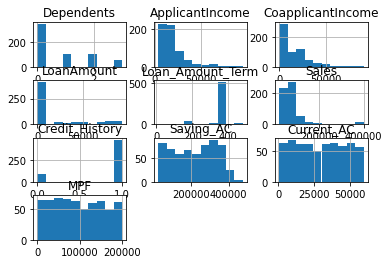

In [233]:
df.hist() # the eyes from the God!

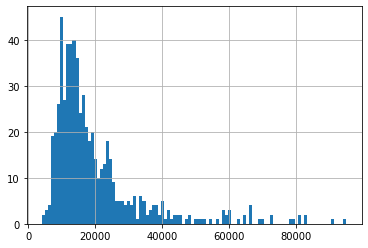

In [234]:
df['ApplicantIncome'].hist(bins=100)

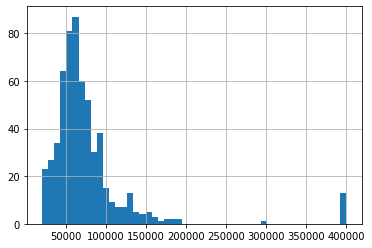

In [235]:
df['Sales'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


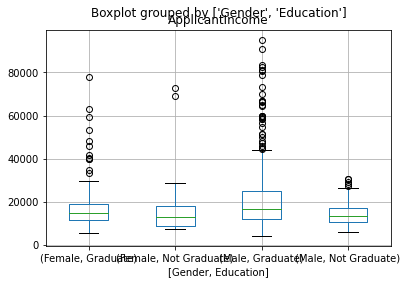

In [236]:
df.boxplot(column='ApplicantIncome', by=['Gender', 'Education'])

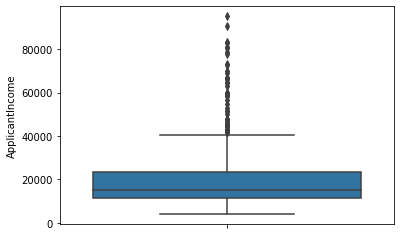

In [237]:
sns.boxplot(y=df['ApplicantIncome'])

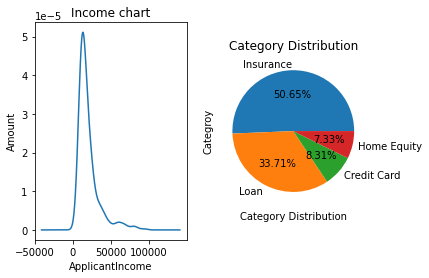

In [238]:
temp1 = df['ApplicantIncome']
temp2 = df['Product_Category'].value_counts()
fig = plt.figure() # start to draw
ax1 = fig.add_subplot(121) # 1 row, 2 columns, No.1 chart
ax2 = fig.add_subplot(122) # 1 row, 2 columns, No.2 chart
temp1.plot(kind='kde', ax=ax1) #kind=’line’ kind=’bar’
ax1.set_xlabel('ApplicantIncome')
ax1.set_ylabel('Amount')
ax1.set_title("Income chart")
temp2.plot(kind='pie', autopct='%1.2f%%', ax=ax2)  # %1 means integer   .2f%  2 floating points
ax2.set_xlabel('Category Distribution')
ax2.set_ylabel('Categroy')
ax2.set_title("Category Distribution")
plt.show()

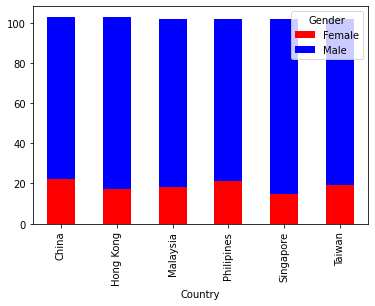

In [239]:
temp3=pd.crosstab(df['Country'],df['Gender'])      
temp3.plot(kind='bar', stacked=True, color=['red','blue'],grid=False)

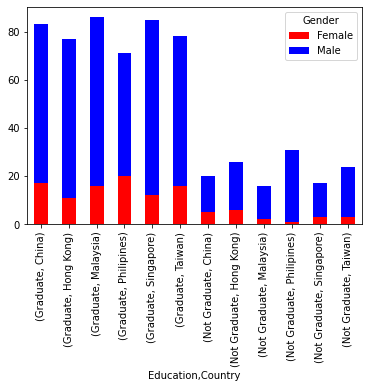

In [240]:
temp3=pd.crosstab([df['Education'],df['Country']],df['Gender'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'],grid=False)

In [241]:
table1=df.groupby('Product')[['Sales']].median()   #pivot table 
print(table1)

                               Sales
Product                             
Accidential Insurance        74250.0
Car Loan                     61500.0
Credit Card Cash Advance     35000.0
Credit Card Payment          54000.0
Home-Equity Lines of Credit  65000.0
Home-Equity Loan             59750.0
Homesafe Insurance           64250.0
Life Insurance               57000.0
Personal Loan                69000.0
Small Business Loans         68250.0
Student Loan                 56750.0


In [242]:
group=pd.cut(df['ApplicantIncome'],[0,40000,60000])
table2=df.pivot_table('Sales', ['Product', group],'Product_Category')
print(table2)
table2.to_csv("table2.csv")
table2.to_excel("table2-excel.xlsx")

Product_Category                              Credit Card  ...          Loan
Product                     ApplicantIncome                ...              
Accidential Insurance       (0, 40000]                NaN  ...           NaN
                            (40000, 60000]            NaN  ...           NaN
Car Loan                    (0, 40000]                NaN  ...  61950.000000
                            (40000, 60000]            NaN  ...  61750.000000
Credit Card Cash Advance    (0, 40000]       49973.684211  ...           NaN
                            (40000, 60000]   35000.000000  ...           NaN
Credit Card Payment         (0, 40000]       52051.724138  ...           NaN
Home-Equity Lines of Credit (0, 40000]                NaN  ...           NaN
Home-Equity Loan            (0, 40000]                NaN  ...  58596.774194
                            (40000, 60000]            NaN  ...  80000.000000
Homesafe Insurance          (0, 40000]                NaN  ...           NaN

In [243]:
df.isnull().sum()  #finding missing values!!!

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Sales                29
Credit_History       50
Country               0
Loan_Status           0
Product               0
Product_Category      0
Saving_AC             0
Current_AC            0
MPF                   0
Perference            0
dtype: int64

In [244]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Sales,Credit_History,Country,Loan_Status,Product,Product_Category,Saving_AC,Current_AC,MPF,Perference
0,LD001536,Male,Yes,3.0,Graduate,No,59996,0.0,NaN,180.0,NaN,0.0,Taiwan,N,Life Insurance,Home Equity,364610,56585,69108,Face To Face
1,LD002840,Female,No,0.0,Graduate,No,9512,0.0,NaN,360.0,NaN,1.0,Philipines,N,Personal Loan,Loan,48187,16681,127375,Online
2,LD001030,Male,Yes,2.0,Graduate,No,5196,10860.0,NaN,120.0,NaN,1.0,Singapore,Y,Personal Loan,Loan,380180,46129,97624,Online
3,LD001325,Male,No,0.0,Not Graduate,No,14480,0.0,NaN,120.0,NaN,1.0,Philipines,Y,Personal Loan,Loan,49062,5022,69577,Face To Face
4,LD001482,Male,Yes,0.0,Graduate,Yes,13836,0.0,NaN,120.0,NaN,1.0,Hong Kong,Y,Personal Loan,Loan,339129,2348,77182,Face To Face


In [245]:
df['Sales'].describe()

count       585.000000
mean      76735.897436
std       57692.047453
min       20000.000000
25%       50000.000000
50%       64000.000000
75%       84000.000000
max      400000.000000
Name: Sales, dtype: float64

In [246]:
df['LoanAmount'].describe()

count      594.000000
mean     18501.683502
std      30535.206184
min          0.000000
25%          0.000000
50%          0.000000
75%      36875.000000
max      93500.000000
Name: LoanAmount, dtype: float64

In [247]:
df['Sales'].fillna(df['Sales'].median(), inplace=True)   #important
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Sales,Credit_History,Country,Loan_Status,Product,Product_Category,Saving_AC,Current_AC,MPF,Perference
0,LD001536,Male,Yes,3.0,Graduate,No,59996,0.0,NaN,180.0,64000.0,0.0,Taiwan,N,Life Insurance,Home Equity,364610,56585,69108,Face To Face
1,LD002840,Female,No,0.0,Graduate,No,9512,0.0,NaN,360.0,64000.0,1.0,Philipines,N,Personal Loan,Loan,48187,16681,127375,Online
2,LD001030,Male,Yes,2.0,Graduate,No,5196,10860.0,NaN,120.0,64000.0,1.0,Singapore,Y,Personal Loan,Loan,380180,46129,97624,Online
3,LD001325,Male,No,0.0,Not Graduate,No,14480,0.0,NaN,120.0,64000.0,1.0,Philipines,Y,Personal Loan,Loan,49062,5022,69577,Face To Face
4,LD001482,Male,Yes,0.0,Graduate,Yes,13836,0.0,NaN,120.0,64000.0,1.0,Hong Kong,Y,Personal Loan,Loan,339129,2348,77182,Face To Face


In [248]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Sales                 0
Credit_History       50
Country               0
Loan_Status           0
Product               0
Product_Category      0
Saving_AC             0
Current_AC            0
MPF                   0
Perference            0
dtype: int64

In [249]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Sales,Credit_History,Country,Loan_Status,Product,Product_Category,Saving_AC,Current_AC,MPF,Perference
609,LD002624,Male,Yes,0.0,Graduate,No,83332,66670.0,0.0,360.0,400000.0,NaN,Singapore,N,Life Insurance,Home Equity,455518,21356,197754,Online
610,LD002693,Male,Yes,2.0,Graduate,Yes,31792,71660.0,0.0,360.0,400000.0,1.0,Hong Kong,N,Life Insurance,Home Equity,279718,40742,102480,Online
611,LD002699,Male,Yes,2.0,Graduate,Yes,70000,0.0,0.0,360.0,400000.0,1.0,Malaysia,N,Life Insurance,Home Equity,300453,7271,139568,Online
612,LD002813,Female,Yes,1.0,Graduate,Yes,77936,0.0,0.0,360.0,400000.0,1.0,Malaysia,N,Life Insurance,Home Equity,427226,24193,143552,Online
613,LD002959,Female,Yes,1.0,Graduate,No,48000,0.0,0.0,360.0,400000.0,1.0,Philipines,N,Life Insurance,Home Equity,362558,39977,68703,Online


In [250]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Sales                 0
Credit_History       50
Country               0
Loan_Status           0
Product               0
Product_Category      0
Saving_AC             0
Current_AC            0
MPF                   0
Perference            0
dtype: int64

In [251]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [252]:
df['Self_Employed'].fillna('No', inplace=True)

In [253]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [254]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Sales                 0
Credit_History       50
Country               0
Loan_Status           0
Product               0
Product_Category      0
Saving_AC             0
Current_AC            0
MPF                   0
Perference            0
dtype: int64

In [255]:
df.to_csv("output.csv")   #it will save to your local PC or in Google Colab now.
df.to_excel("output-excel.xlsx")

In [256]:
from google.colab import files   #for Google only, used for download file from Google Colab

files.download('output.csv')
files.download('output-excel.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>